##Project description

**Background:** Gene expression can be approximated by measuring the level of mRNA, where higher mRNA levels are typically indicative of higher gene expression. mRNA levels can be measured by RNA sequencing (or more specifically, see 8:10-10:10 [cDNA](https://https://www.youtube.com/watch?v=-kTcFZxP6kM&t=663s)) by [short-read sequencing](https://www.youtube.com/watch?v=fCd6B5HRaZ8&t=243s), which can reveal how highly each gene is expressed relative to other genes in an organism. 

Since proteins that work together in e.g., protein complex, need to be all present in correct abundances to form a functioning complex, mRNA levels of interacting proteins tend to be [correlated](https://en.wikipedia.org/wiki/Correlation_and_dependence), i.e., expressed in the same ratios throughout the life of an organism. Genes whose mRNAs are correlated are [co-expressed](https://en.wikipedia.org/wiki/Gene_co-expression_network). Co-expression analysis is thus a powerful method to identify functionally related genes.

The overarching aim of this project is to identify novel photosynthetic genes in your assigned organism. To do this, you will use gene expression data to perform a co-expression analysis and identify novel components of the photosynthesis complex. These genes can then be further studied by others to improve photosynthesis, and increase crop yield.

**Do not import any other modules and packages, than the ones already specified by Marek. Yes, other modules can simplify some of the tasks, but your job is to demonstrate that you can use very basic Python to solve these challenges.**


*To those of you interested in bioinformatics, we will also offer an internship in Marek's lab at the end of the course.*



# Week 9 - Annotating RNA-sequencing data

Your group is given a zip file containing two files:

* _runtable contains the annotations of the RNA-seq samples used in your expression matrix
* The other file contains the actual expression matrix (i.e., a table of numbers). The rows represent genes, while the columns represent RNA-seq samples

**Prerequisites:** None

**Tasks:** This week's task is:
* Annotate all samples within the _runtable file

Load the runtable file into excel as a comma-separated file (google the way to do this). You will most likely see something like this:

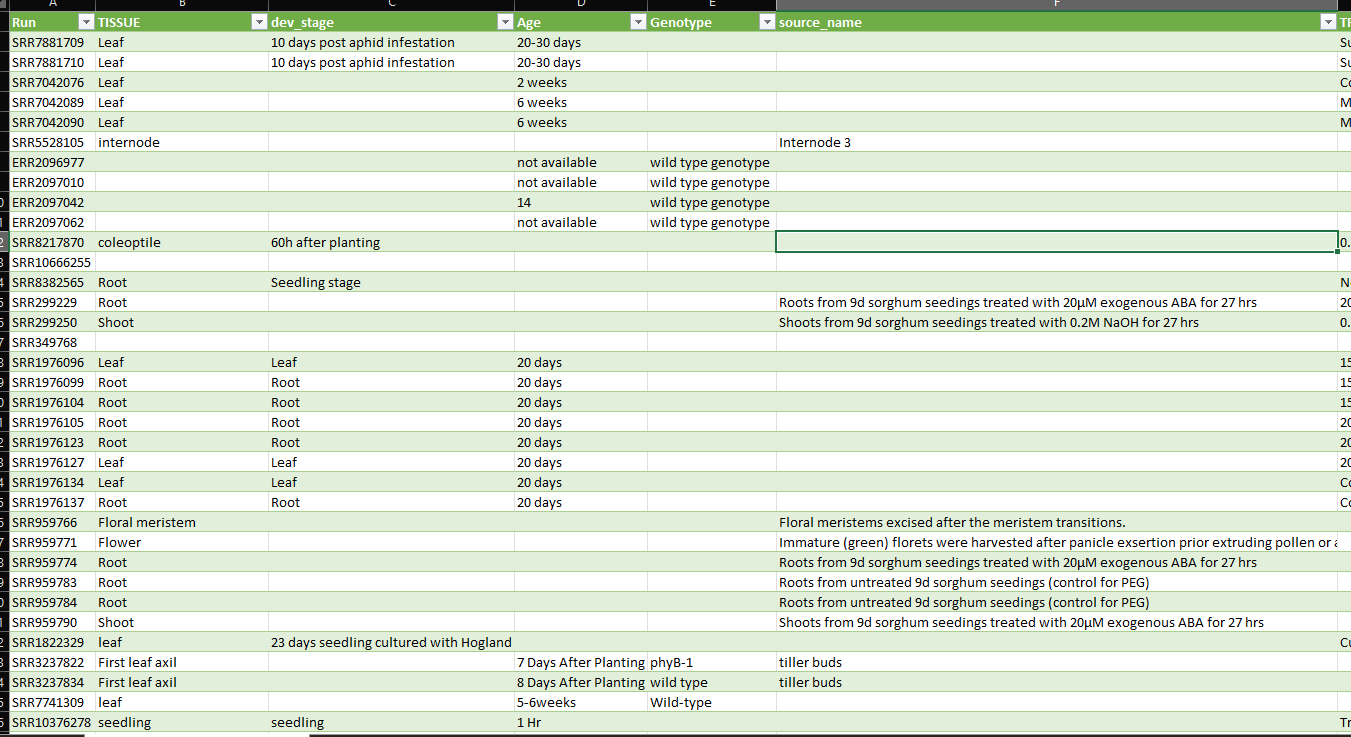

In the first column, you see the ID of the RNA-seq sample, and in further columns you will see other info. You are looking for the info containing the description of the samples. As you can see, the information is often scattered, without consistency or even sometimes missing. This is because the different groups submitting the data to a repository are often not following guidelines, or are outright lazy. 

To make use of the data, we have to annotate the samples in a consistent manner. This is where you come in. 
Your task is to go over each row in the table and produce 'sample_annotation.txt' file for your species. More specifically, you have to match the fuzzy annotations in runinfo to the Plant Ontology (PO) annotations, found in **PlantOntologyStudents.txt** file. PO provides a structured vocabulary describing plant anatomy (you can read more here: https://www.ebi.ac.uk/ols/ontologies/po).

To make the annotation, study the runinfo file, understand the anatomy of your organism and what the different PO terms represent.

For example, the annotations of the first few samples above should be:





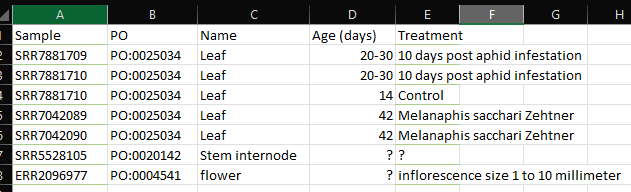

##Task 1 - Annotate the RNA-seq experiments

There should be ~500 samples in your runinfo, and you need them by week 12, so you have three weeks to get it done. Divide the annotations fairly among your group and grind through the table. 

The file resulting file should contain 5 columns:
1. The RNA-seq sample ID, that **must also be found in the expression matrix**
2. The PO term
3. PO term description, from the PlantOntologyStudents.txt file
4. Age of the plant
5. Any additional info that you found, e.g., age, treatment, mutation.

Save the result as X_sample_annotation.txt where X is your group ID. Send the file to Marek together with your final report. Note: do not use programming to solve this... Only humans can reliably do the annotation (for now).

# Week 10 - Identifying the most co-expressed photosynthesis gene

**Prerequisites**: Working knowledge of strings, lists, loops, dictionaries and reading/writing files.

**Tasks**: You have three tasks this week. 
1. Retrieve all genes involved in photosynthesis. 
2. Construct a co-expression network that shows which of these genes have similar expression profiles.
3. Identify a gene with the most connections (i.e., most co-expressed to) to the other photosynthesis genes.

It is time to check whether your expression matrix can be used to predict gene function. This is called a '[sanity check](https://en.wikipedia.org/wiki/Sanity_check)', where you check whether your script and data can produce an **expected outcome**. After analyzing co-expression networks from tens of different organisms, you will realize that in all of them the photosynthesis genes are co-expressed. If they are not, then something is clearly wrong, and two possibilities exist:

1. You have made an error in your network-generating script
2. The gene expression data for your organism is of poor quality. Consult the instructor. 


##Task 1 - Retrieve all genes involved in photosynthesis.

To retrieve all genes involved in photosynthesis, open the _mapman.txt file of your species to view MapMan ontology annotations. 

Which MapMan bin represents photosynthesis? Which genes are involved in photosynthesis? 

Now, write a script to parse the mapman file and add all photosynthesis-related genes to the genes_of_interest list.

First, mount your google drive and find the path to your files in the 'Files' menu on the right.

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Your solution should have 6-10 lines of code

In [ ]:
genes_of_interest = []
#Write your solution below

file = open("/content/gdrive/MyDrive/Groups/Brassica_napus_mapman.txt", "r").readlines() #read line by line

for line in file:
  category = line.split("\t") #split the lines by tab
  if category[1].split(".")[0].lower() == "photosynthesis":
    if category[2] != "" and category[2] not in genes_of_interest:
      genes_of_interest.append(category[2])

#For checking
print("There are a total of", len(genes_of_interest), "genes involved in photosynthesis.") 
print(genes_of_interest)

There are a total of 1011 genes involved in photosynthesis.
['gsbrna2t00150775001', 'gsbrna2t00093773001', 'gsbrna2t00154986001', 'gsbrna2t00085157001', 'gsbrna2t00095328001', 'gsbrna2t00076200001', 'gsbrna2t00058211001', 'gsbrna2t00141918001', 'gsbrna2t00035007001', 'gsbrna2t00095325001', 'gsbrna2t00109662001', 'gsbrna2t00105568001', 'gsbrna2t00139448001', 'gsbrna2t00055712001', 'gsbrna2t00078161001', 'gsbrna2t00132322001', 'gsbrna2t00141425001', 'gsbrna2t00041426001', 'gsbrna2t00141424001', 'gsbrna2t00095326001', 'gsbrna2t00077027001', 'gsbrna2t00117529001', 'gsbrna2t00009877001', 'gsbrna2t00045057001', 'gsbrna2t00108591001', 'gsbrna2t00080643001', 'gsbrna2t00034252001', 'gsbrna2t00012630001', 'gsbrna2t00119546001', 'gsbrna2t00116782001', 'gsbrna2t00008518001', 'gsbrna2t00145627001', 'gsbrna2t00119862001', 'gsbrna2t00028150001', 'gsbrna2t00151448001', 'gsbrna2t00136666001', 'gsbrna2t00054222001', 'gsbrna2t00008021001', 'gsbrna2t00057907001', 'gsbrna2t00103066001', 'gsbrna2t0008308600

Now that you have the relevant genes, retrieve their expression profiles from the expression matrix. To this end, use a dictionary called id_to_exp = {}. Keys should be gene IDs (string), while values should be gene expression values (float). For example, the dictionary should look like:

id_to_exp = {'geneA':[4.7,2.2,5.4,6.8], 'geneB':[1.1, 2.5, 5.4, 6.1]}

Your solution should have 6-10 lines of code

In [ ]:
id_to_exp = {}

#Write your solution below

for line in open("/content/gdrive/MyDrive/BS1009/Brassica_napus-3708_2.txt", "r").readlines():
  matrix = line.split("\t")   # split lines by tabs
  if matrix[0].lower() in genes_of_interest:    # check for whether the name of genes in 'matrix' file is in genes_of_interest
    sub_lst = []   # create an empty list to store individual gene's matrices temp
    for i in range(len(matrix[1:])):    # run through the matrices' values which starts from index 1 in the 'matrix' file
      sub_lst.append(float(matrix[i+1]))   # append the matrices' values in float into sub_lst
    if max(sub_lst) != 0:
      id_to_exp[matrix[0]] = sub_lst    # if there is non-zero value, assign value (sub_lst) to key (matrix), we do not want to add matrices that only contain '0'

#For checking
print(len(id_to_exp))

1010


##Task 2 - Construct a co-expression network of the photosynthetic genes

Now that you have a list and expression of relevant genes, it is time to construct a co-expression network. To this end, you need to compare all possible pairs of genes and decide which of these pairs have similar expression profiles. To achieve this, you should use [Pearson Correlation Coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) (PCC, also denoted by r), which can be used to calculate the similarities between two vectors (lists) of numbers, such as gene expression values. R ranges from -1 (two genes are perfectly anti-correlated), through 0 (two genes are not correlated) to 1 (two genes are perfrectly correlated). Thus, genes with r value close to 1 are correlated, indicating that they are co-expressed. 

In [ ]:
from scipy import stats #imports the stats module that contains many statistical methods

#Example 1.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [10, 20, 30, 40, 50]) #two expression vectors are perfectly correlated
print('The first r-value is ', r)

#Example 2.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [10, 50, 20, 40, 30]) #two exoression vectors are poorly correlated
print('The second r-value is ', r)

#Example 2.
r, p = stats.pearsonr([1, 2, 3, 4, 5], [5, 4, 3, 2, 1]) #twi exoression vectors are perfectly anti-correlated
print('The third r-value is ', r)

The first r-value is  1.0
The second r-value is  0.30000000000000004
The third r-value is  -1.0


To construct the co-expression network, calculate r between **all possible pairs of genes**, and use high cut-off (e.g., r>0.9, r>0.8 or r>0.7) to indicate which pairs of genes are co-expressed. Add the pairs of co-expressed genes to network list. For example, if genes a and b, and genes b and c are co-expressed, your list should look like:

network = [['a','b'],['b','c']]

Adjust r cut-off to obtain ~100 pairs of co-expressed genes. Do the number of pairs increase or decrease when you increase r cut-off? Why?

You might get a warning 'An input array is constant; the correlation coefficient is not defined.   warnings.warn(PearsonRConstantInputWarning())'. What does it mean and why are you getting this error?

Your solution should have 6-10 lines of code

In [ ]:
from scipy import stats

network = []
#Write your solution below
key_lst = list(id_to_exp.keys())    #Get a list of keys
for i in range(len(key_lst)):
  for j in range(i+1, len(key_lst)): 
    r , p = stats.pearsonr(id_to_exp[key_lst[i]], id_to_exp[key_lst[j]])
    if r > 0.999999999999999:
        network.append([key_lst[i], key_lst[j]])

#For checking
print(network)    
print(len(network))   

[['GSBRNA2T00056555001', 'GSBRNA2T00108787001'], ['GSBRNA2T00056555001', 'GSBRNA2T00154107001'], ['GSBRNA2T00056555001', 'GSBRNA2T00154101001'], ['GSBRNA2T00056555001', 'GSBRNA2T00108793001'], ['GSBRNA2T00043082001', 'GSBRNA2T00108811001'], ['GSBRNA2T00043082001', 'GSBRNA2T00043092001'], ['GSBRNA2T00108785001', 'GSBRNA2T00106249001'], ['GSBRNA2T00108785001', 'GSBRNA2T00154099001'], ['GSBRNA2T00108785001', 'GSBRNA2T00056553001'], ['GSBRNA2T00108785001', 'GSBRNA2T00154109001'], ['GSBRNA2T00108785001', 'GSBRNA2T00108795001'], ['GSBRNA2T00106249001', 'GSBRNA2T00154099001'], ['GSBRNA2T00106249001', 'GSBRNA2T00056553001'], ['GSBRNA2T00106249001', 'GSBRNA2T00154109001'], ['GSBRNA2T00106249001', 'GSBRNA2T00108795001'], ['GSBRNA2T00154096001', 'GSBRNA2T00015407001'], ['GSBRNA2T00055104001', 'GSBRNA2T00154104001'], ['GSBRNA2T00055104001', 'GSBRNA2T00056558001'], ['GSBRNA2T00055104001', 'GSBRNA2T00012636001'], ['GSBRNA2T00055104001', 'GSBRNA2T00108790001'], ['GSBRNA2T00130304001', 'GSBRNA2T000326

To visualize your co-expression network, run the cell below. An interactive network should appear.

In [ ]:
#@markdown Run this cell to visualize the network. If you change the network, rerun this cell. 


import IPython
from IPython.display import display, HTML

def style_one_node(GeneID, shape, color):
  '''Returns the string of html css style sheet to be added to the index html file'''
  node_styling='''\
              {
              selector: 'node[id="GENEID"]',
              style: {
                  shape: 'ENTER_SHAPE',
                  'background-color': 'ENTER_COLOR',
                  }
              },
  '''
  node_styling = node_styling.replace('GENEID', GeneID)
  node_styling = node_styling.replace('ENTER_SHAPE', shape)
  node_styling = node_styling.replace('ENTER_COLOR', color)

  return node_styling

def generate_html_index(list_of_edges):
  '''Returns a string of a html with javascript code to render the network from list_of_nodes and list_of_edges. list_of_nodes = ['a','b','c'], list_of_edges = [['a','b'],['b','c']]'''
  front_html = '''\
  <!doctype html>
  <html>
    <head>
        <title>Network on Cytoscape</title>
        <script src='https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.9.4/cytoscape.min.js'></script>
    </head>

    <style>
        #cy {
            width: 1000px;
            height: 950px;
            }
    </style>

    <body style="background-color:rgb(194, 229, 243);">
      <div><p>Click to download as: <br><a id="pngimage" href="#" download="NetworkImage.png">Image</a> | <a id="cyjson" href="#" download="NetworkImage.json">JSON</a></p></div>
      <div id="cy"></div>
      <script>
        var cy = cytoscape({
          container: document.getElementById('cy'),
  '''


  mid_html = '''\
          elements: {
              nodes: [\n
  '''

  list_of_nodes = []
  for i in list_of_edges:
      list_of_nodes +=i
  list_of_nodes = list(set(list_of_nodes)) 

  #get nodes
  # { data: { id: 'a', node_type: 'q/t', color: 'x', shape: 'z' } },
  for j in list_of_nodes:
      shape, color = "triangle", "Silver"
      ntype = "linked"
      new_node = "\t"*5 + "{\n" + "\t"*6 + "data: {\n" +\
        "\t"*6 + "id: \'" + j + "\',\n" +\
        "\t"*6 + "node_type: \'" + ntype + "\',\n" +\
        "\t"*6 + "color: \'" + color + "\',\n" +\
        "\t"*6 + "shape: \'" + shape + "\'\n" + "\t"*6 + "}\n" + "\t"*5 + "}"
      if list_of_nodes.index(j) != len(list_of_nodes)-1:
        new_node += ",\n"
      else:
        new_node += "\n\t\t\t\t],\n"
      mid_html += new_node

  mid2_html = '''\
              edges: [\n
  '''
  mid_html += mid2_html
  #get edges
  for i in range(len(list_of_edges)):
    ID = list_of_edges[i][0] + " | " + list_of_edges[i][1]
    source = list_of_edges[i][0]
    target = list_of_edges[i][1]
    new_edge = "\t"*5 + "{\n" + "\t"*6 + "data: {\n" +\
      "\t"*7 + "id: \'" + ID + "\',\n" +\
      "\t"*7 + "source: \'" + source + "\',\n" +\
      "\t"*7 + "target: \'" + target + "\'\n" + "\t"*6 + "}\n" + "\t"*5 + "}"
    if i != (len(list_of_edges)-1):
      new_edge += ",\n"
    else:
      new_edge = new_edge + "\n\t\t\t\t]\n"
    mid_html += new_edge

  back_html = '''\
            },
            style: [
              { 
              selector: "node",
              style: {
                  shape: 'data(shape)',
                  'height': '3px',
                  'width': '3px',
                  'background-color': 'data(color)',
                  label: 'data(id)',
                  'border-style':'solid',
                  'border-color':'black',
                  'border-width':'0.1px',
                  'font-size': 1.2,
                  'text-margin-y':'-0.4px',
                  'text-outline-color':'white',
                  'text-outline-width':'0.15px',
                  'text-outline-opacity':0.8
                  }
              },
              {
              selector: 'edge',
              style: {
                  'width': '0.1px',
                  'line-style':'solid',
                  'line-fill':'solid',
                  'background-color': '#F5F5F5',
                  'opacity':0.4
                  }
              },
              {
              selector:'core',
              style: {
                  'outside-texture-bg-color':'white',
                  'outside-texture-bg-opacity':1
                  }
              },
            ],
            layout: {
              name: 'cose',
              animateThreshold: 1,
              nodeOverlap: 100,
              gravity: 400,
              componentSpacing: 100,
              edgeElasticity: 100,
              minTemp: 1,
              initialTemp: 1000,
              stop: function() {
                  //generate PNG image to display from "id = pngimage"
                  var png64 = cy.png({bg:'white'});
                  document.getElementById('pngimage').setAttribute('href', png64);
                  //generate JSON to download for id = cyjson
                  var jsonc = JSON.stringify(cy.json(), null, "\\t");
                  document.getElementById('cyjson').setAttribute('href', 'data:text/plain;charset=utf-8,' + encodeURIComponent(jsonc));
              }
            }
        });

      </script>
    </body>
  </html>
  '''

  index_html = front_html + mid_html + back_html
  return index_html

def save_index_file(index_html, guide_gene):
  '''Writes the html/js string into a html file and return the path to the new html file'''
  network_html_path = "Network_index_" + guide_gene + '.html'
  with open(network_html_path, 'w+') as index_file:
    index_file.write(index_html)
  print("HTML file saved in: " + network_html_path+ "\n")
  return network_html_path

##Run this cell to see an example of the network. Do not alter this code.
network_z = generate_html_index(network)
index_html = network_z.replace('NetworkImage', 'Genes') #Specify Name of png file to be downloaded based on guide gene
network_html_path = save_index_file(index_html, 'Genes')
IPython.display.HTML(filename = network_html_path)

## Task 3: Which gene is mostly co-expressed with the other genes? 

Now that you have the network, you can identify a gene that has the highest number of connections to other genes. Genes with high node degree (number of connections) are often playing a central role in a given biological process. Thus, by identifying this gene, you will likely identify the most important component of photosynthesis.

Write a script that takes the network file (in form of [['a','c'], ['a','b'],['a','d']]), and returns the ID of the most highly connected gene (in this example 'a'). In case of a tie, take the first most highly connected gene that you found. Write down the ID of the gene, as you will need it next week.

Note down the ID of this gene, as you will need it next week.

Your solution should have ~20 lines of code

In [ ]:
gene_lst = []   #An empty list to store all the individual genes

#Unpair the genes in network and add individual genes into gene_lst
for genepair in network:
  for gene in genepair:
    gene_lst.append(gene)

gene_lst.sort()   #Sort
#print(gene_lst)  

most_connected = gene_lst[0]    #Gene that is assigned to be most connected by default
count = 0   #Count of genes that is not the most connected
most_count = 0    #Count of current most connected

#Check for the most connected genes from gene_lst a.k.a. the gene which appeared the most time
for i in range(0, len(gene_lst)):

#Check if the current gene in this iteration is the same gene as the assigned most connected gene
  if gene_lst[i] == most_connected:  
    most_count += 1

#Check if the current gene in this iteration is different from the gene in the previous iteration
  elif gene_lst[i] != gene_lst[i-1]:    
    count = 1

#Check if the current gene in this iteration is BOTH 1) the same as the gene in the previous iteration and 2) is not the same gene as the assigned most connected gene    
  else:  
    count += 1

#When count is greater than most_count, replace most_connected with the current gene which is supposedly more connected than the initial assigned
#Also, replace most_count with count and reset count to 0
    if count > most_count:    
      most_connected = gene_lst[i]
      most_count = count    
      count = 0

  # print(most_count)   
  # print(count)   
   
print(most_connected)  

#Answer: GSBRNA2T00056553001 (5 times)

GSBRNA2T00056553001


#Week 11 - Identify novel components of photosystem

**Prerequisites**: You have constructed a co-expression network and identified a gene with the highest node degree. You should have a working knowledge of strings, lists, dictionaries and reading files.

You have two tasks this week:
1. Identify **top 50 genes** co-expressed with the gene that you found last week. Use R value to identify the top 50 genes.
2. Discuss the function of the **top 50 genes** found in the above list. What do they do, and does their function fit with photosynthesis?



In [ ]:
#Mount Google Drive
from scipy import stats
from google.colab import drive
import os
drive.mount('/content/gdrive')

##Task 1: Identify genes co-expressed with your query gene
First, you need to retrieve gene annotations (descriptions) from the mapman file. Open the file in Excel and decide on how to extract functional information from the file. Then, create a gene_to_anno dictionary, which should look like:

gene_to_anno = {'geneA':'protein kinase','geneB':'ribosomal protein'}

Your solution should have ~5-10 lines of code

In [ ]:
gene_to_anno = {}

#Write your solution below.
file = open("/content/gdrive/MyDrive/BS1009/Brassica_napus_mapman.txt", "r").readlines() #read line by line
for line in file:
  category = line.split("\t") #split the lines by tab
  if category[2] != "": #check if there is a geneID then assign the annotation to the geneID
    gene_to_anno[category[2].upper()] = category[3]
        
#For checking
print(len(gene_to_anno))

101040


Now that you have the annotations, load in the gene expression matrix. Then, calculate the r value between the most_connected gene and **all genes in the genome**. Finally, display the top 50 genes that are most co-expressed with the most_connected gene. 

The output should look something like this:

R | Gene ID | Description
--- | --- | ---
1 | most_connected | Photosystem gene X
0.95 | ? | ?
0.94 | ? | ?
0.87 | ? | ?
0.85 | ? | ?
0.82 | ? | ?
... | ... | ...

Expect ~15-30 lines of code

In [ ]:
gene_of_interest = 'GSBRNA2T00056553001' #the ID of the gene from week 10

#Write your solution below
from scipy import stats

gene_lst = []
gene_to_exp = {}

gene_exp = open("/content/gdrive/MyDrive/BS1009/Brassica_napus-3708_2.txt", "r").readlines()

for i in range(1, len(gene_exp)):
  sub_lst = []
  matrix = gene_exp[i].split("\t")
  for i in range(len(matrix[1:])):    # run through the matrices' values which starts from index 1 in the 'matrix' file
    sub_lst.append(float(matrix[i+1]))   # append the matrices' values in float into sub_lst
  if max(sub_lst) != 0:
    gene_to_exp[matrix[0]] = sub_lst    # if there is non-zero value, assign value (sub_lst) to key (matrix), we do not want to add matrices that only contain '0'

all_genes = list(gene_to_exp.keys())

for key in all_genes:
  r, p = stats.pearsonr(id_to_exp[gene_of_interest], gene_to_exp[key])
  if key in gene_to_anno:  
    gene_lst.append([r, key, gene_to_anno[key]])
  
gene_lst.sort(reverse=True)

i = 0
count_chk = 0
r_lst =[]

print("S/N","\t", "r", "\t\t\t", "Gene_ID", "\t\t", "Description")
for gene in gene_lst:
  i += 1
  if gene[0] not in r_lst and count_chk < 50:  #make sure no repeat with same r value and total count is 50
    r_lst.append(gene[0])      
    count_chk += 1
    print(i, "\t", gene[0], "\t", gene[1], "\t", gene[2])  #print serial number, r value, Gene_ID and description respectively


S/N 	 r 			 Gene_ID 		 Description
1 	 0.9999999999999999 	 GSBRNA2T00154109001 	 component PsaI of PS-I complex
7 	 0.986985706612899 	 GSBRNA2T00032585001 	 Ribulose bisphosphate carboxylase large chain OS=Brassica oleracea (sp|p48686|rbl_braol : 108.0)
8 	 0.9841280735115545 	 GSBRNA2T00052660001 	  no hits & (original description: none)
9 	 0.9841280735115544 	 GSBRNA2T00147271001 	  no hits & (original description: none)
16 	 0.9812702713205871 	 GSBRNA2T00106253001 	 Ribulose bisphosphate carboxylase large chain OS=Brassica oleracea (sp|p48686|rbl_braol : 199.0)
17 	 0.9775651631372472 	 GSBRNA2T00152253001 	 Photosystem I iron-sulfur center OS=Pelargonium hortorum (sp|q06fq3|psac_pelho : 95.5)
18 	 0.9756666601873872 	 GSBRNA2T00096198001 	 Cytochrome f OS=Brassica rapa subsp. rapa (sp|p36438|cyf_brarr : 194.0)
19 	 0.914549127464812 	 GSBRNA2T00087265001 	 component PsbH of PS-II complex
21 	 0.8532197163928746 	 GSBRNA2T00114772001 	 component NOT3/5 of mRNA deadenylation CCR4

TAs: the list should contain various components of photosystem, primary metabolism or other chloroplast-related genes.
There are going to be some genes annotated as 'no hits'. These represent novel proteins which are perhaps undiscovered components of photosystems. Exciting!

##Task 2: Analyzing the list
Are the genes above involved in photosynthesis? What is the function of some of the unexpected genes? Can you explain their presence in your list? Discuss this in the final report!

#Week 12 - Plotting expression profile of your photosynthetic gene
An expression profile of a gene can tell you a great deal about it's function. Plotting in Python can be easy, but we have not covered it during the class. However, you can use the code below to make a plot with Seaborn package. Seaborn (https://seaborn.pydata.org/examples/index.html) is a python package that provides many fancy ways to visualize the data.

You will use barplots to indicate the average expression of your gene in the different organs, and use standard deviation to indicate the spread of the data. 

The example below plots the expression profile of an imaginary gene with nine expression values: 3 in leaves, 3 in roots and 3 in seeds. 


In [ ]:
import pandas as pd
import seaborn as sns

expression = [10,11,29,30,35,25, 100,110,130] #expression vector
organs = ['leaf','leaf','leaf','root','root','root','seed','seed','seed'] #annotation list

df = pd.DataFrame({'Expression':expression, 'Organs':organs}) #The data is entered into a dataframe (google what it is if you are interested)

g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval
g.set_xticklabels(rotation=90)

Using the annotations that you have generated during the first week, retrieve the sample annotations and their corresponding expression values of your gene. Then, like in the example above, plot the values.

How is your gene expressed? Does the expression profile make sense from a biological point of view? 

Expect to write ~30-40 lines of code

In [ ]:
import pandas as pd
import seaborn as sns

gene_of_interest = 'GSBRNA2T00056553001'
anomaly_list = ["SRR7880328", "SRR7880332", "SRR7880335", "SRR7880338", "SRR7880339","SRR5715222", "SRR12615535", "SRR10180429"]

#Your solution below
exp_matrices = open("/content/gdrive/MyDrive/BS1009/27_Brassica_napus-3708_2/Brassica_napus-3708_2.txt", "r").readlines()
sample_anno = open("/content/gdrive/MyDrive/BS1009/27_Sample_Annotation.txt", "r").readlines()

goi_exp = {}

organ_exp = []
expression = []
organs = []

organ_dict = {}

for i in range(1, len(exp_matrices)):
  matrix = exp_matrices[i].strip().split("\t")
  if gene_of_interest == matrix[0]:
    for i in range(1, len(matrix)):
      goi_exp[exp_matrices[0].strip().split("\t")[i]] = float(matrix[i])

for i in range(1, len(sample_anno)):
  anno = sample_anno[i].strip().split("\t")
  if anno[2] not in organ_dict:
    organ_dict[anno[2]] = goi_exp[anno[0]]
  else:
    organ_dict[anno[2]] += goi_exp[anno[0]]


for sample in goi_exp:
  for i in range(1, len(sample_anno)):
    anno = sample_anno[i].strip().split("\t")
    if sample == anno[0] and organ_dict[anno[2]] != 0 and anno[0] not in anomaly_list:
      organ_exp.append([anno[2].lower(), goi_exp[sample]])

organ_exp.sort()

for exp in organ_exp:
  expression.append(exp[1])
  organs.append(exp[0])

# For checking
# print(goi_exp)
# print(organ_dict)
# print(organ_exp)
# print(expression)
# print(organs)

{'SRR8442256': 0.0, 'SRR9179175': 0.0, 'SRR10015161': 0.0, 'SRR12429704': 0.0, 'SRR12364338': 1.65043, 'ERR420261': 0.0, 'SRR8632088': 0.0, 'SRR3134224': 0.0, 'SRR12363918': 3.70629, 'SRR9037468': 0.0, 'ERR037306': 0.0, 'SRR6685974': 0.0, 'SRR6865637': 0.0, 'SRR12363940': 1.60256, 'SRR3134288': 0.0, 'SRR1793916': 0.0, 'SRR11412588': 0.0, 'ERR3850127': 0.0, 'SRR3091547': 0.0, 'ERR556913': 0.0, 'SRR9010577': 2.12114, 'SRR5208532': 0.0, 'SRR12363923': 3.5524, 'SRR12364326': 3.46287, 'SRR11412566': 0.0, 'SRR12363925': 0.0, 'SRR3134171': 0.0, 'SRR5358966': 0.0, 'SRR10848730': 0.935598, 'SRR12615535': 1333.2, 'SRR7814566': 0.0, 'SRR10019860': 0.0, 'SRR10015157': 9.43202, 'SRR6466847': 0.0, 'SRR3088687': 0.0, 'SRR11412574': 1.14005, 'SRR7816636': 0.0, 'SRR8699005': 0.0, 'SRR11845009': 5.71165, 'SRR3147785': 0.0, 'SRR8632081': 0.0, 'SRR3134211': 0.0, 'SRR3950012': 0.0, 'SRR12363921': 1.75143, 'SRR10019843': 0.0, 'SRR12364793': 8.65461, 'SRR6685964': 0.0, 'SRR7880338': 626.655, 'SRR9599650': 0.

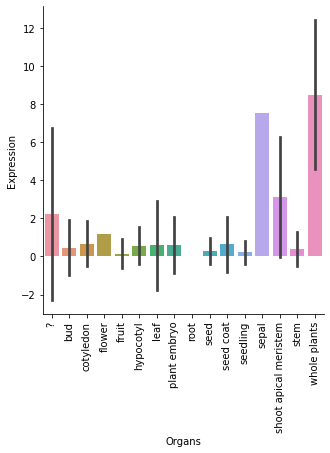

In [ ]:
#Plug in your data into the seaborn
df = pd.DataFrame({'Expression':expression, 'Organs':organs}) #The data is entered into a dataframe (google what it is if you are interested)

g = sns.catplot(data=df, kind="bar", x="Organs", y="Expression", ci="sd") #the dataframe is used to plot barplots, using standard deviation to indicate confidence interval
g.set_xticklabels(rotation=90)

#Week 13 - Project report

The end!
Now, write a short report discussing the project. There are 5 chapters.

Please write the report within this colab notebook and submit it to Marek. Please strictly follow the guidelines of the word limit. Penalties will be given for too short or too long reports.

**Description of your species** (~250 words)
* Evolutionary relationships (is it a monocot, eudicot, what are the relatives?)
* Uses (what is this plant used for?)
* Genome size, number of genes, ploidy (google this info)
* Anatomy (what kind of organs does it have?)

**Network analysis** (~250 words)
* How many genes did you identify from the mapman annotation? What major components of the photosystem did you identify and what is the function of these components?
* What was your strategy to identify the most connected gene?

**Co-expression list analysis** (~250 words)
* What are the functions of the top 50 co-expressed genes? 
* Does this fit with their role in photosynthesis?
* Did you find anything unexpected?

**Expression profile analysis** (~125 words)
* Expression plot interpretation. How is your gene expressed and how do you interpret this expression in terms of photosynthesis?

**Conclusion** (~125 words)
* Summarize the outcomes and impressions from the project


**Send your X_sample_annotation.txt file to Marek, where X is your group number!!!**



---




# **Project Report_27**
**BS1009 Introduction to Computational Thinking**

**Name:**


*   Andy Chua Yi Ming
*   Lim Yan Ying, Hester
*   Tan Shu Ann, Kayla
*   Wee Xin Rong





---
###**Description of your species**

The species we researched on is Brassica napus, also known as the Rapeseed plant. A member of the Brassicaceae (mustard) family, it is a hybrid species resulting from the interspecific breeding between Brassica oleracea and Brassica rapa. [1] Brassica napus is a tetraploid; it contains four sets of homologous chromosomes within each somatic cell. Tagged AACC, it has a chromosome count of 2n=38, meaning that it contains two copies of both the A and C genomes, which possess 10 and 9 chromosomes respectively (n=19 chromosomes in each gamete). [2] It has 89857 genes, with 12.5% being coding sequences, and 99481 transcripts. [1] This plant is a dicotyledon; the seedling possesses two seed leaves within the seed, and the adult plant has broad stalked leaves with net-like veins. [3] 
 
Characterised by pale yellow flowers which have four obovate petals arranged diagonally opposite one another, they grow on the plant’s main and axillary branches. Tetradynamous stamens are contained within the flowers, meaning that they each possess four long and two short stamens. Brassica napus has relatively smooth stems, and an average height of 1.5 metres. Its leaves are hairless, fleshy, and bluish-green in colour, with an enlarged base that partially clasps the stem. Its fruit is a cylindrical silique containing fifteen or more spherical seeds arranged in single file. [1] Brassica napus is cultivated mostly for its seed that is rich in canola oil, which is commonly utilised in cooking, and the manufacturing of soap and margarine. 
 


---



###**Network analysis**

There are a total of 1010 genes identified in total. The major components of the photosystem identified are photosystem I,II, cytochrome complex, electron carriers, NADH dehydrogenase, ATP synthase complex, glycine decarboxylase complex. Each major component is made up of several genes that makes up the structure of the major components and give them their functional properties. They include functions such as electrons carrier, stabilising factors, regulatory proteins, assembly factors, oxygen-evolving centre, translation activator, apoprotein component, cyclic electron flow, chlororespiration, subunits of ATP complexes and assembly factors, carboxylase/oxygenase activity, kinases and etc. Ultimately, all of these help in the process of photophosphorylation, calvin cycle, photorespiration, CAM/C4 photosynthesis and carbon dioxide-bicarbonate interconversion.

To identify the most connected gene, we first retrieved genes that were related to photosynthesis from the mapman file provided. Then we obtained the expression matrix of the genes involved in photosynthesis from 27_Brassica_napus-3708_2.txt. A dictionary called id_to_exp is then used to store this information with the gene name being the key and the matrix as the value. Subsequently, the genes in the dictionary are compared in pairs to obtain their correlation in expression profiles. Ultimately, we obtained 107 pairs of genes with r>0.999999999999999 and stored them in a list named network. A for loop is then used to tabulate the number of appearances of genes in the list; with the gene that appeared the most being the most interconnected gene. It turned out to be GSBRNA2T00056553001 and appeared a total of 5 times.


---


###**Co-expression list analysis**

Generally, a gene with high node degree plays a critical role in a biological process. Assuming that the most connected gene identified is a principal component of photosynthesis, the top 50 co-expressed genes, by supposition, are as well. 
 
For instance, the top co-expressed gene with ID GSBRNA2T00154109001 codes for a subunit of photosystem I. Similarly, several other genes in our list code for components of photosystems I and II. Photosystems are photosynthetic pigments that are the functional units of photosynthesis, embedded in the leaves. Upon excitation, photosystems convert light energy into chemical energy - producing ATP via an electron transport chain and reducing NADP+. Collectively, these reactions are grouped under the light-dependent stage of photosynthesis.[4] 
 
Genes GSBRNA2T00032585001, GSBRNA2T00106253001 and GSBRNA2T00108798001 code for a large chain of “ribulose bisphosphate carboxylase”, also known as RuBisCO. It is an essential enzyme that catalyzes the attachment of CO2 to a compound named D-ribulose 1,5-bisphosphate during the carbon fixation step of the light-independent stage of photosynthesis, which result in formation of glucose. [4]
 
Furthermore, several genes code for subunits of the cytochrome b6f complex, which mediates the transfer of electrons between photosystems I and II, and transfers protons across the thylakoid membrane into the lumen. [5] This creates the vital proton gradient that drives the synthesis of ATP in chloroplasts. 
 
The top 50 co-expressed genes mostly code for components that are involved in photosynthesis. However, several genes were tagged with the description “no hits”, which possibly represent novel proteins that are undiscovered components of photosystems. 


---


###**Expression profile analysis**

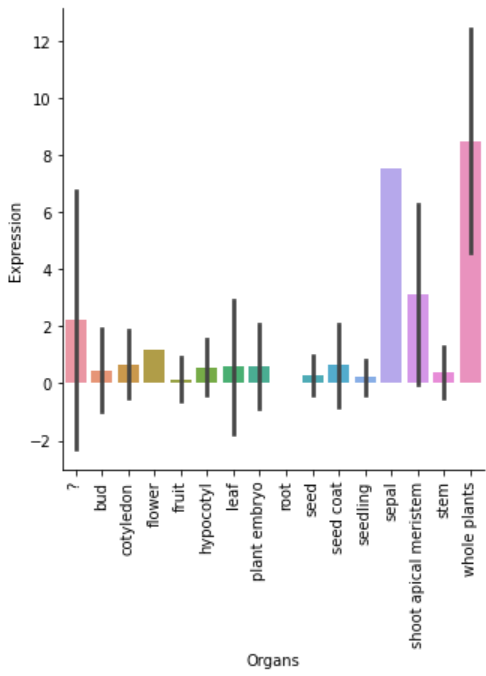

Individual genes with unusually high expression among genes in the same organs (e.g one leave genes with over 9000 in value) are removed from the plot. Ultimately, the three most expressed genes are whole plant, sepal and shoot apical meristem. This make biological sense as the whole plant represents the cumulation of gene expression from all the organs and meristem being responsible for the generation of shoot and leaves which undergoes photosynthesis. [6] However, the high expression in sepal is unexpected as its low stomata density will result it having a slower rate of photosynthesis than leaves. [7] This anomaly could likely be due to only one sepal expression data available as shown in the lack of standard deviation in the plot.  


---


###**Conclusion**

Through this project, we investigated Brassica napus. Our main aim was to understand this species in relation to photosynthesis. We realised that the top 50 co-expressed photosynthesis genes identified were responsible for the components(e.g. photosystems) necessary for photosynthesis. After identifying and plotting for the expression of  the most connected photosynthesis gene, we felt that the degree of expressivity of the gene made sense in most organs, with the exception of the sepal.
Through working on this project, we were able to utilise our interdisciplinary knowledge to investigate Brassica napus. Unlike humans, computer algorithms can filter, retrieve and tabulate information much more efficiently and accurately. This allowed us to devote more of our valuable time and effort for meaningful analysis and interpretation of results. 


---


###**Bibliography**

[1] The Biology of Brassica napus L. (Canola/Rapeseed). (2017, December 22). Government of Canada. Retrieved April 11, 2022, from https://inspection.canada.ca/plant-varieties/plants-with-novel-traits/applicants/directive-94-08/biology-documents/brassica-napus-l-/eng/1330729090093/1330729278970 
 
[2] Chalhoub, B, F Denoeud, S Liu, I A Parkin, H Tang et al. , 2014. Early allopolyploid evolution in the post-Neolithic Brassica napus oilseed genome. Science 345: 950–953. 10.1126/science.1253435. Retrieved April 11, 2022. 
 
[3] Monocots versus Dicots. University of California Museum of Paleontology. Retrieved April 11, 2022
 
[4] Cornell, B. (n.d.). Light Dependent Reactions. BioNinja. Retrieved April 11, 2022, from https://ib.bioninja.com.au/higher-level/topic-8-metabolism-cell/untitled-2/light-dependent-reactions.html. Retrieved April 11, 2022. 
 
[5] Hasan SS, Yamashita E, Baniulis D, Cramer WA (Mar 2013). "Quinone-dependent proton transfer pathways in the photosynthetic cytochrome b6f complex". Proceedings of the National Academy of Sciences of the United States of America. 110 (11): 4297–302. doi:10.1073/pnas.1222248110. PMC 3600468. PMID 23440205. Retrieved Aprill 11, 2022. 
 
[6] Barton, M. K. (2009, December 1). Twenty Years on: The inner workings of the shoot apical meristem, a developmental dynamo. Developmental Biology. Retrieved April 24, 2022, from https://www.sciencedirect.com/science/article/pii/S0012160609013840#:~:text=The%20shoot%20apical%20meristem%20of,establishment%20of%20new%20leaf%20primordia. 

[7] Photosynthetica. (n.d.). Photosynthetic performance of vegetative and reproductive structures of green hellebore (helleborus viridis L. agg.). Photosynthetica. Retrieved April 24, 2022, from https://ps.ueb.cas.cz/artkey/phs-200501-0007_photosynthetic-performance-of-vegetative-and-reproductive-structures-of-green-hellebore-helleborus-viridis-l.php 


---
